In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from skimpy import skim

In [4]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 301    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 9      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year             │   0 │     0 │      2014 │   2.892 │  2003 │   2012 │   2014 │   2016 │    2018 │   ▂▃▇▅ │  │
│ │ Selling_Price    │   0 │     0 │     4.661 │   5.083 │   0.1 │    0.9 │    3.6 │      6 │      35 │   ▇▂   │  │
│ │ Present_Price    │   0 │     0 │     7.628 │   8.643 │  0.32 │    1.2 │    6.4 │    9.9 │    92.6 │   ▇▁   │  │
│ │ Driven_kms       │   0 │     0 │     36950 │   38890 │   500 │  15000 │  32000 │  48770 │  500000 │   ▇    │  │
│ │ Owner            │   0 │     0 │   0.04319 │  0.2479 │     0 │      0 │      0 │      0 │       3 │   ▇    │  │
│ └──────────────────┴─────┴───────┴───────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃            ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max        ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Car_Name  │  0 │    0 │ sx4      │ Royal     │ 800       │ xcent      │      9.86 │          2 │       592 │  │
│ │           │    │      │          │ Enfield   │           │            │           │            │           │  │
│ │           │    │      │          │ Thunder   │           │            │           │            │           │  │
│ │           │    │      │          │ 500       │           │            │           │            │           │  │
│ │ Fuel_Type │  0 │    0 │ CNG      │ Petrol    │ CNG       │ Petrol     │      5.98 │          1 │       301 │  │
│ │ Selling_t │  0 │    0 │ Dealer   │ Individua │ Dealer    │ Individual │      7.41 │          1 │       301 │  │
│ │ ype       │    │      │          │ l         │           │            │           │            │           │  │
│ │ Transmiss │  0 │    0 │ Manual   │ Automatic │ Automatic │ Manual     │       6.4 │          1 │       301 │  │
│ │ ion       │    │      │          │           │           │            │           │            │           │  │
│ └───────────┴────┴──────┴──────────┴───────────┴───────────┴────────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(2)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,299,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,299.0,NaN,NaN,NaN,2013.615385,2.896868,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,299.0,NaN,NaN,NaN,4.589632,4.98424,0.1,0.85,3.51,6.0,35.0
Present_Price,299.0,NaN,NaN,NaN,7.541037,8.566332,0.32,1.2,6.1,9.84,92.6
Driven_kms,299.0,NaN,NaN,NaN,36916.752508,39015.170352,500.0,15000.0,32000.0,48883.5,500000.0
Fuel_Type,299,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Selling_type,299,2,Dealer,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,299,2,Manual,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,299.0,NaN,NaN,NaN,0.043478,0.24872,0.0,0.0,0.0,0.0,3.0


In [14]:
df.shape

(299, 9)

In [15]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


In [16]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

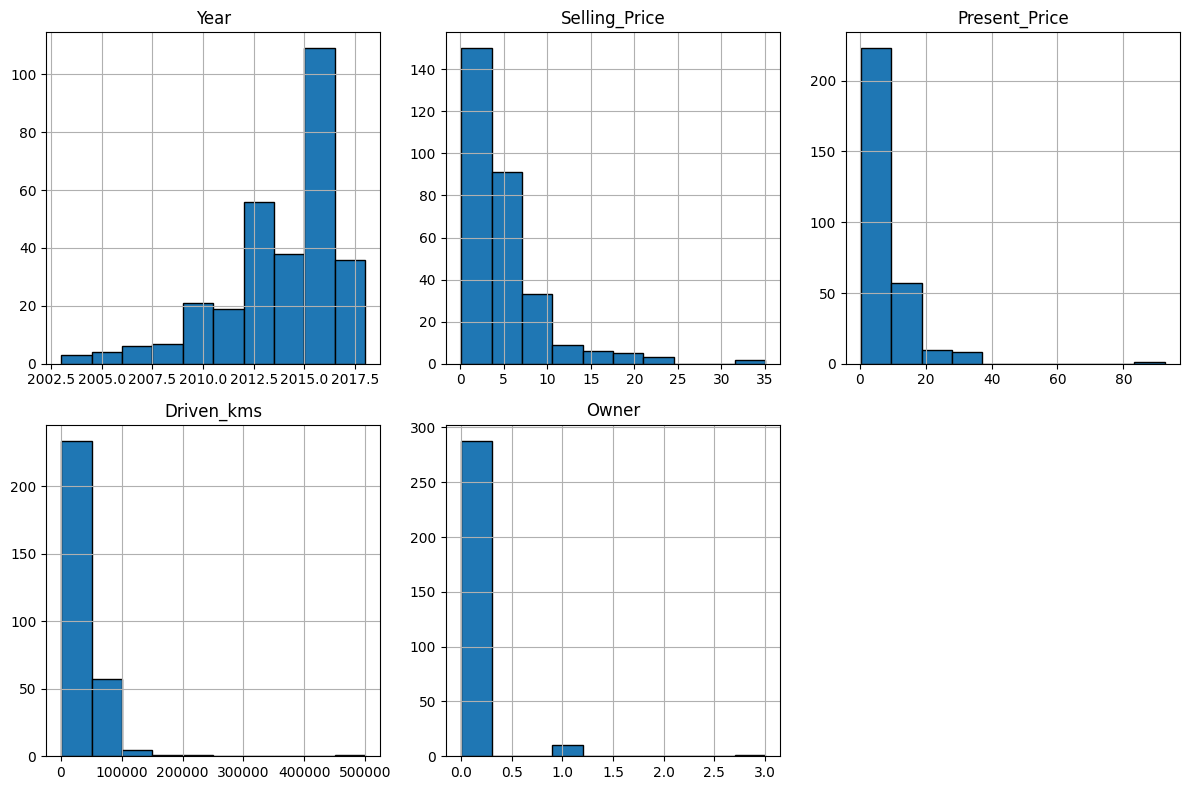

In [18]:
df.hist(figsize=(12, 8), layout=(2, 3), edgecolor='black')
plt.tight_layout()
plt.show()

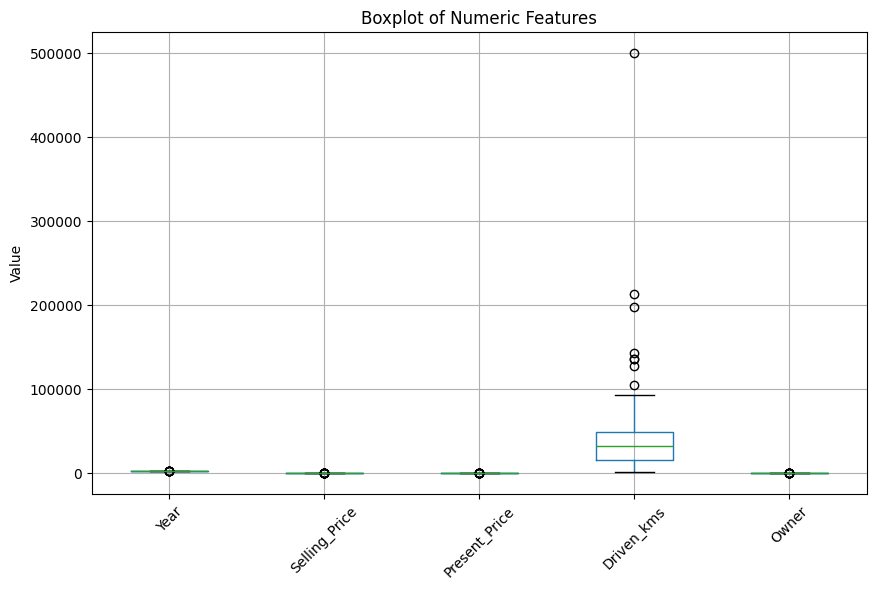

In [19]:
df.boxplot(column=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], figsize=(10, 6))
plt.title('Boxplot of Numeric Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

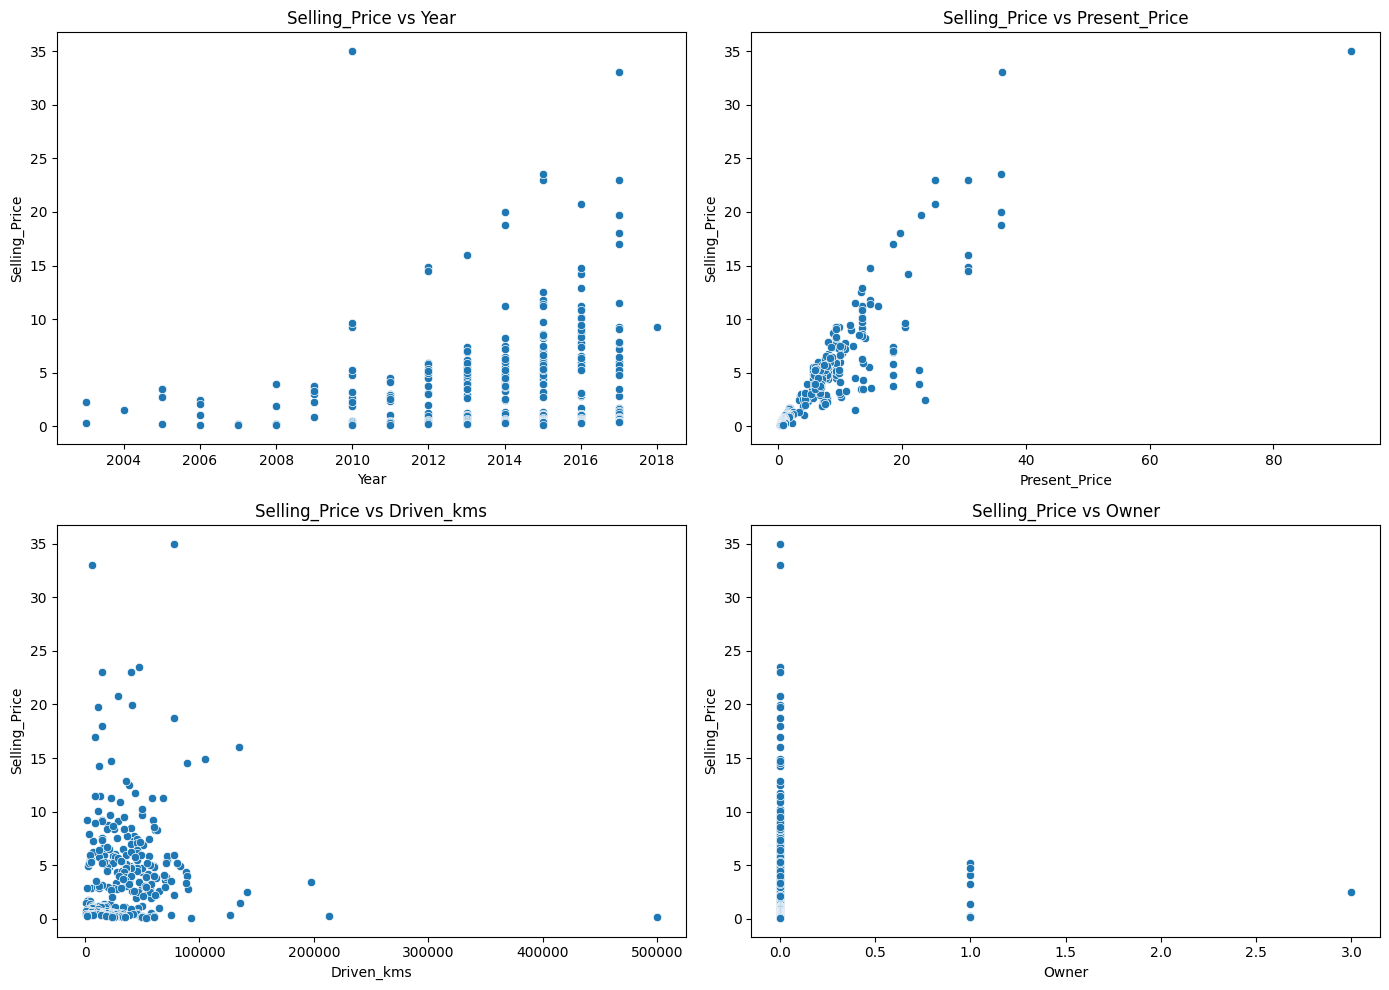

In [20]:
# Multivariate analysis: Selling_Price vs Numerical Features
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.scatterplot(data=df, x=feature, y='Selling_Price', ax=ax)
    ax.set_title(f'Selling_Price vs {feature}')
plt.tight_layout()
plt.show()

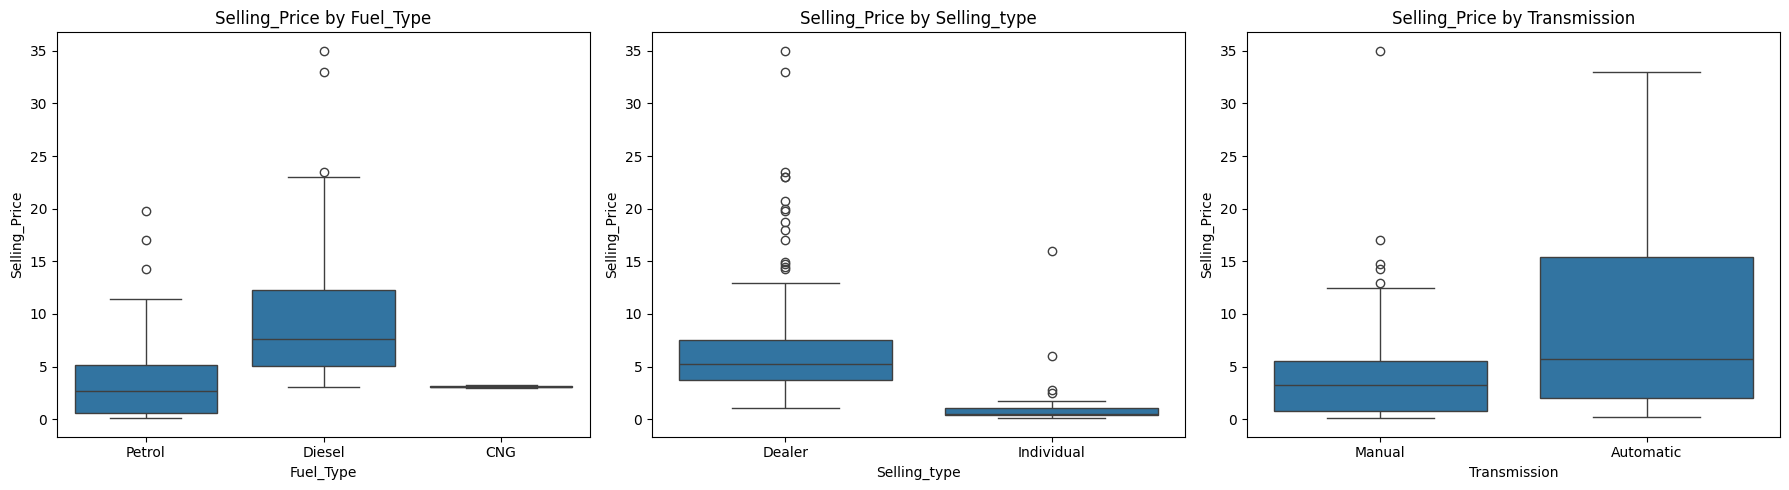

In [21]:
# Multivariate analysis: Selling_Price vs Categorical Features
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, feature in zip(axes, categorical_features):
    sns.boxplot(data=df, x=feature, y='Selling_Price', ax=ax)
    ax.set_title(f'Selling_Price by {feature}')
plt.tight_layout()
plt.show()

## Feature Engineering

In [22]:
df['Car_Age'] = 2025 - df["Year"]
df.drop('Year', axis=1, inplace=True)

In [23]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])  # Only brand name
df.drop('Car_Name', axis=1, inplace=True)

In [24]:
# Additional Feature Engineering

# 1. Price per year (Present_Price divided by Car_Age)
df['Price_per_Year'] = df['Present_Price'] / df['Car_Age']

# 2. Log transformation for skewed features
df['Log_Driven_kms'] = np.log1p(df['Driven_kms'])

# 3. Interaction feature: Present_Price * Driven_kms
df['Price_Kms_Interaction'] = df['Present_Price'] * df['Driven_kms']

# 4. Is owner (binary: 0 if first owner, 1 otherwise)
df['Is_Owner'] = (df['Owner'] > 0).astype(int)

df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age,Brand,Price_per_Year,Log_Driven_kms,Price_Kms_Interaction,Is_Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,ritz,0.508182,10.203629,150930.0,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,sx4,0.795000,10.668979,410220.0,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,ciaz,1.231250,8.839422,67965.0,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,wagon,0.296429,8.556606,21580.0,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,swift,0.624545,10.656106,291631.5,0


In [25]:
Q1 = df['Driven_kms'].quantile(0.25)
Q3 = df['Driven_kms'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Driven_kms'] < (Q1 - 1.5 * IQR)) | (df['Driven_kms'] > (Q3 + 1.5 * IQR)))]

In [26]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age,Brand,Price_per_Year,Log_Driven_kms,Price_Kms_Interaction,Is_Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,ritz,0.508182,10.203629,150930.0,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,sx4,0.795000,10.668979,410220.0,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,ciaz,1.231250,8.839422,67965.0,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,wagon,0.296429,8.556606,21580.0,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,swift,0.624545,10.656106,291631.5,0


In [27]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
num = ['Driven_kms', 'Owner', 'Car_Age']

In [30]:
cat = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']

In [31]:
y_train

220    3.50
229    3.10
226    5.25
78     5.25
26     4.15
       ... 
198    0.15
75     3.95
114    1.15
280    5.25
110    1.20
Name: Selling_Price, Length: 232, dtype: float64

In [32]:
trf1 = ColumnTransformer([
    ("Scale", StandardScaler(),num),
    ("OHE", OneHotEncoder(drop='first', sparse_output=True , handle_unknown='ignore'),cat)
], remainder="passthrough")


In [33]:
trf2 = LinearRegression()

In [34]:
pipe = Pipeline([
    ('transformer', trf1),
    ('regressor', trf2)
])

In [35]:
pipe.fit(X_train, y_train)

,steps,"[('transformer', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Scale', ...), ('OHE', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
# Predict on test set
y_pred = pipe.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2.04
R^2 Score: 0.96


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [37]:
# Get top 10 features by absolute coefficient value
top_idx = np.argsort(np.abs(importances))[-10:][::-1]
top_features = feature_names[top_idx]
top_importances = importances[top_idx]

plt.figure(figsize=(8, 5))
sns.barplot(x=top_importances, y=top_features, orient='h')
plt.title('Top 10 Feature Importances (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

NameError: name 'importances' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Mean CV R^2 score:", cv_scores.mean())

Cross-validation R^2 scores: [0.79486746 0.8689407  0.94657426 0.87177387 0.92944678]
Mean CV R^2 score: 0.8823206140497041


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


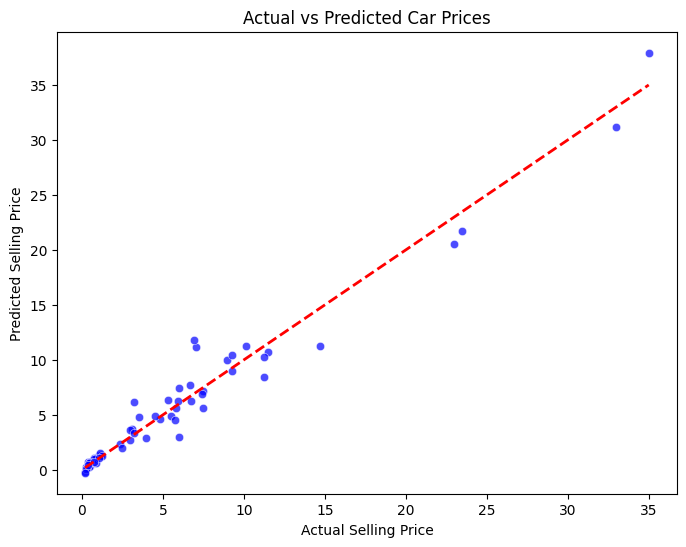

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # Perfect line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


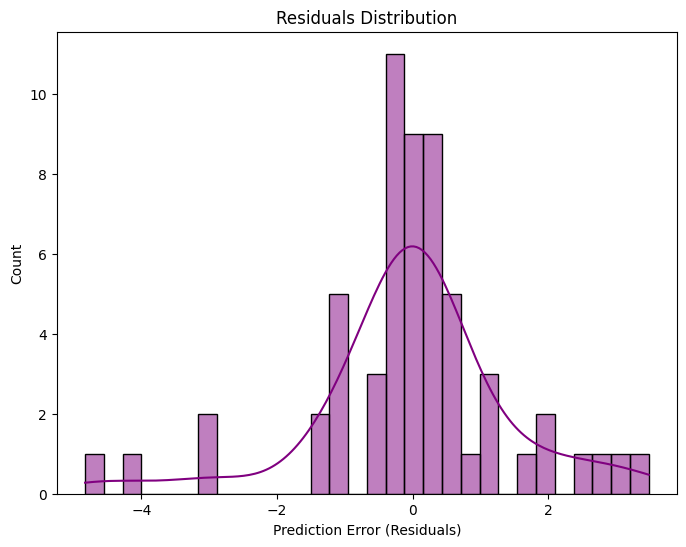

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Prediction Error (Residuals)")
plt.title("Residuals Distribution")
plt.show()

In [38]:
import pickle

# Save the pipeline (transformer + model) as a pickle file
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(pipe, f)

print("Model saved successfully!")


Model saved successfully!
